In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data = open('AM.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           136400    
_________________________________________________________________
bidirectional (Bidirectional (None, 16, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 16, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 682)               68882     
_________________________________________________________________
dense_1 (Dense)              (None, 1364)              931612    
Total params: 1,598,494
Trainable params: 1,598,494
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
192/192 [==============================] - 17s 86ms/step - loss: 5.1828 - accuracy: 0.0774
Epoch 2/100
192/192 [==============================] - 16s 86ms/step - loss: 5.0570 - accuracy: 0.0822
Epoch 3/100
192/192 [==============================] - 17s 86ms/step - loss: 4.9510 - accuracy: 0.0913
Epoch 4/100
192/192 [==============================] - 17s 87ms/step - loss: 4.8663 - accuracy: 0.0937
Epoch 5/100
192/192 [==============================] - 16s 86ms/step - loss: 4.7793 - accuracy: 0.0980
Epoch 6/100
192/192 [==============================] - 16s 86ms/step - loss: 4.6987 - accuracy: 0.1009
Epoch 7/100
192/192 [==============================] - 17s 87ms/step - loss: 4.6328 - accuracy: 0.1068
Epoch 8/100
192/192 [==============================] - 16s 86ms/step - loss: 4.5563 - accuracy: 0.1100
Epoch 9/100
192/192 [==============================] - 17s 86ms/step - loss: 4.4846 - accuracy: 0.1175
Epoch 10/100
192/192 [==============================] - 16s 86ms/step - l

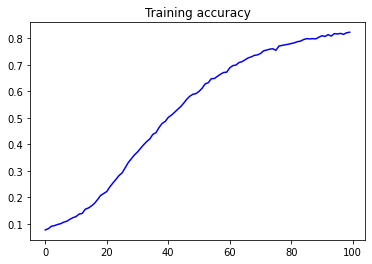

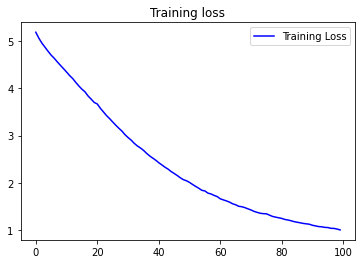

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [14]:
seed_text = "I really like the Arctic Monkeys and "
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I really like the Arctic Monkeys and  at me just been me so around there's lover i'll fall long long time round but you know if you want to tell there slippers of stay with against the wall end action lined up popping up up up and stay with your hands around your head around my neck gets lotion i sit and talk to me on the floor with in the day round but i said i want to tell settling down or giving up in wicker chair and you imagined i could imagined i could want to you found the place on of stay with the
